In [47]:
%load_ext autoreload
%autoreload 2
import numpy as np, h5py, os, matplotlib.pyplot as plt
from math import sqrt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
output_path_data = "../hdf5/Scan_{0:d}/scan_{0:d}_data.h5"
output_path_scan = "../hdf5/Scan_{0:d}/scan_{0:d}.h5"
data_paths = {'up': "detectors/lambda_up", 'far': "detectors/lambda_far", 'down': "detectors/lambda_down"}
scan_paths = {'up': "scans/lambda_up", 'far': "scans/lambda_far", 'down': "scans/lambda_down"}
fast_crds_path = "motor_coordinates/fast_coordinates"
slow_crds_path = "motor_coordinates/slow_coordinates"

In [102]:
scan_file = h5py.File(os.path.abspath(output_path.format(143)), 'r')
data_far = scan_file[far_path][:]
data_up = scan_file[up_path][:]
data_down = scan_file[down_path][:]

In [103]:
sums_far = data_far.sum(axis=(-2, -1)).reshape((size, size))
sums_up = data_up.sum(axis=(-2, -1)).reshape((size, size))

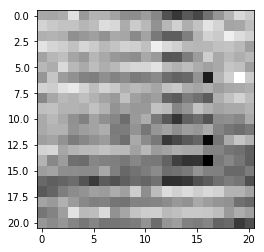

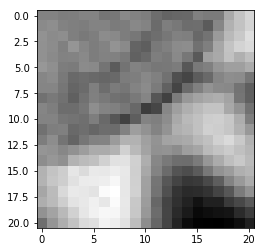

In [104]:
%matplotlib inline
plt.figure()
plt.imshow(sums_far, cmap='gist_gray')
plt.figure()
plt.imshow(sums_up, cmap='gist_gray')
plt.show()

In [206]:
scan_file = h5py.File(output_path_scan.format(245), 'r')
fast_crds, slow_crds = scan_file[fast_crds_path][:], scan_file[slow_crds_path][:]
fast_size, slow_size = scan_file["scan_size/fast_size"][()], scan_file["scan_size/slow_size"][()]
scans = [scan_file[path][:] for path in scan_paths.values()]
scanspad = [np.concatenate((scan, np.zeros((fast_size * slow_size - scan.size)))).reshape((fast_size, slow_size)) for scan in scans]

In [246]:
np.concatenate((np.zeros(10), np.zeros(0)), axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [248]:
print(scans[0].size, fast_crds.size, fast_size * slow_size)

205 205 2601


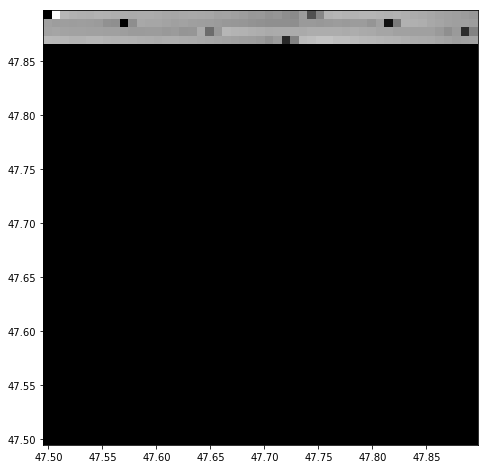

In [242]:
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.imshow(scanspad[1], vmin=2.1e8, vmax=2.25e8, extent=[fast_crds.min(), fast_crds.max(), slow_crds.min(), slow_crds.max()], cmap='gist_gray')
plt.show()

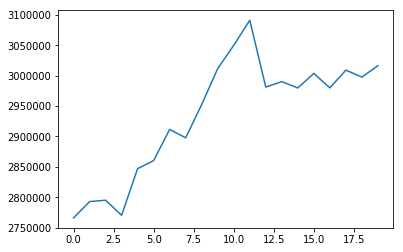

In [201]:
%matplotlib inline
plt.plot((scans[0] + np.concatenate((np.zeros(1), scans[0][:-1,-1] - scans[0][1:,0]))[:, np.newaxis]).ravel()[90:110])